# Concrete Strength Final Project User Interface (version 1.0)
## Ramon Zubiate, Ramy Gerges, Roberto Cortez

### In this notebook, we present data analysis and programming capability using Python. 

In [1]:
#imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


concrete = pd.read_excel('concreteData.xls')

In [2]:
#rename concrete dataframe to approppriate column names

old_concrete_df = concrete #store old here just in case

col_names = ["Cement", "BlastFurnaceSlag", "FlyAsh", "Water", "Superplasticizer",
                 "CoarseAggregate", "FineAggregate", "Age", "CC_Strength"]

new_col_names = list(concrete.columns)

mapper = {}

for i, name in enumerate(new_col_names):
    mapper[name] = col_names[i]

concrete = concrete.rename(columns=mapper)


In [3]:
# Now we need to check for missing values

missing_values = concrete.isnull().sum()

missing_values_count = concrete.isnull().sum().sum()



In [4]:
#run this once and then comment out to get rid of the warning below
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

!jupyter nbextension enable --py widgetsnbextension 
!jupyter serverextension enable voila --sys-prefix

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok
Enabling: voila
- Writing config: C:\Users\ramon\anaconda3\envs\Project\etc\jupyter
    - Validating...
      voila 0.4.0 ok


In [5]:
#Linear Regression user defined inputs
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def lr_predict_strength(cement, blast, fly, water, superplasticizer, coarse_agg, fine_agg, age):
    # Create a dataframe with user inputs
    input_df = pd.DataFrame({
        'Cement': [cement],
        'BlastFurnaceSlag': [blast],
        'FlyAsh': [fly],
        'Water': [water],
        'Superplasticizer': [superplasticizer],
        'CoarseAggregate': [coarse_agg],
        'FineAggregate': [fine_agg],
        'Age': [age]
    })
    # Train a linear regression model on the concrete dataset
    X = concrete.drop('CC_Strength', axis=1)
    y = concrete['CC_Strength']
    model = LinearRegression()
    model.fit(X, y)
    # Predict the compressive strength using the user inputs
    predicted_strength = model.predict(input_df)
    return predicted_strength[0]

In [6]:
#Decision Tree Regressor with user defined inputs

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def dt_predict_strength(cement, blast, fly, water, superplasticizer, coarse_agg, fine_agg, age):
    # Create a dataframe with user inputs
    input_df = pd.DataFrame({
        'Cement': [cement],
        'BlastFurnaceSlag': [blast],
        'FlyAsh': [fly],
        'Water': [water],
        'Superplasticizer': [superplasticizer],
        'CoarseAggregate': [coarse_agg],
        'FineAggregate': [fine_agg],
        'Age': [age]
    })
    # Train a decision tree model on the concrete dataset
    X = concrete.drop('CC_Strength', axis=1)
    y = concrete['CC_Strength']
    model = DecisionTreeRegressor(random_state=42)
    model.fit(X, y)
    # Predict the compressive strength using the user inputs
    predicted_strength = model.predict(input_df)
    return predicted_strength[0]

In [7]:
#Random Forests

from sklearn.ensemble import RandomForestRegressor

def rf_predict_strength(cement, blast, fly, water, superplasticizer, coarse_agg, fine_agg, age):
    # Create a dataframe with user inputs
    input_df = pd.DataFrame({
        'Cement': [cement],
        'BlastFurnaceSlag': [blast],
        'FlyAsh': [fly],
        'Water': [water],
        'Superplasticizer': [superplasticizer],
        'CoarseAggregate': [coarse_agg],
        'FineAggregate': [fine_agg],
        'Age': [age]
    })
    
    # Train a random forest model on the concrete dataset
    X = concrete.drop('CC_Strength', axis=1)
    y = concrete['CC_Strength']
    model = RandomForestRegressor(random_state=42)
    model.fit(X, y)
    
    # Predict the compressive strength using the user inputs
    predicted_strength = model.predict(input_df)
    
    return predicted_strength[0]

In [8]:
import ipywidgets as widgets #import the widgets
from IPython.display import display 
from ipywidgets import Dropdown

cement_input = widgets.FloatText(description='Cement')
blast_input = widgets.FloatText(description='Blast Furnace Slag')
fly_input = widgets.FloatText(description='Fly Ash',)
water_input = widgets.FloatText(description='Water',)
superplastic_input = widgets.FloatText(description='Superplasticizer')
coarse_input = widgets.FloatText(description='Coarse Aggregate')
fine_input = widgets.FloatText(description='Fine Aggregate')
age_input = widgets.FloatText(description='Age')

#make dropdown to select which kind of prediction model user wants to use. Default is linear regression

select_model = widgets.ToggleButtons(
    options=['Linear Regression', 'Decision Trees', 'Random Forest'],
    description='Model:',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
#     icons=['check'] * 3
)

predict_button = widgets.Button(description='Predict') # Create a button widget to trigger the prediction

output = widgets.Output() # Create an output widget to display the predicted compressive strength

# Define a function to make the prediction
def make_prediction(button):
    # Get the input values
    
    #make global variables so that they can be accessed in the next cells
    global cement
    global blast
    global fly
    global water
    global superplastic
    global coarse
    global fine
    global age
   
    cement = cement_input.value
    blast = blast_input.value
    fly = fly_input.value
    water = water_input.value
    superplastic = superplastic_input.value
    coarse = coarse_input.value
    fine = fine_input.value
    age = age_input.value
    
    global prediction #create a prediction variable on global scope
    
    # Display the prediction
    with output:
        output.clear_output()
        if(select_model.value == 'Linear Regression'): #aka use linear regression
            prediction = lr_predict_strength(cement,blast,fly,water,superplastic,coarse,fine,age)
            print('Predicted Strength with Linear Regression: ',prediction,'MPa')
        elif (select_model.value == 'Decision Trees'):
            prediction = dt_predict_strength(cement,blast,fly,water,superplastic,coarse,fine,age)
            print('Predicted Strength with Decision Trees: ', prediction,'MPa')
        else:
            prediction = rf_predict_strength(cement,blast,fly,water,superplastic,coarse,fine,age)
            print('Predicted Strength with Random Forests: ',prediction,'MPa')
    
# Link the button to the prediction function
predict_button.on_click(make_prediction)

# Display the widgets
display(cement_input, blast_input, fly_input, water_input, superplastic_input, coarse_input, fine_input, age_input)
display(select_model)
display(predict_button)
display(output)


FloatText(value=0.0, description='Cement')

FloatText(value=0.0, description='Blast Furnace Slag')

FloatText(value=0.0, description='Fly Ash')

FloatText(value=0.0, description='Water')

FloatText(value=0.0, description='Superplasticizer')

FloatText(value=0.0, description='Coarse Aggregate')

FloatText(value=0.0, description='Fine Aggregate')

FloatText(value=0.0, description='Age')

ToggleButtons(description='Model:', options=('Linear Regression', 'Decision Trees', 'Random Forest'), value='L…

Button(description='Predict', style=ButtonStyle())

Output()

Press this button if you would like to add this data to a test database. (Plot only works on notebook)


Button(description='Add Data', style=ButtonStyle())

Button(description='Plot', style=ButtonStyle())

Output()

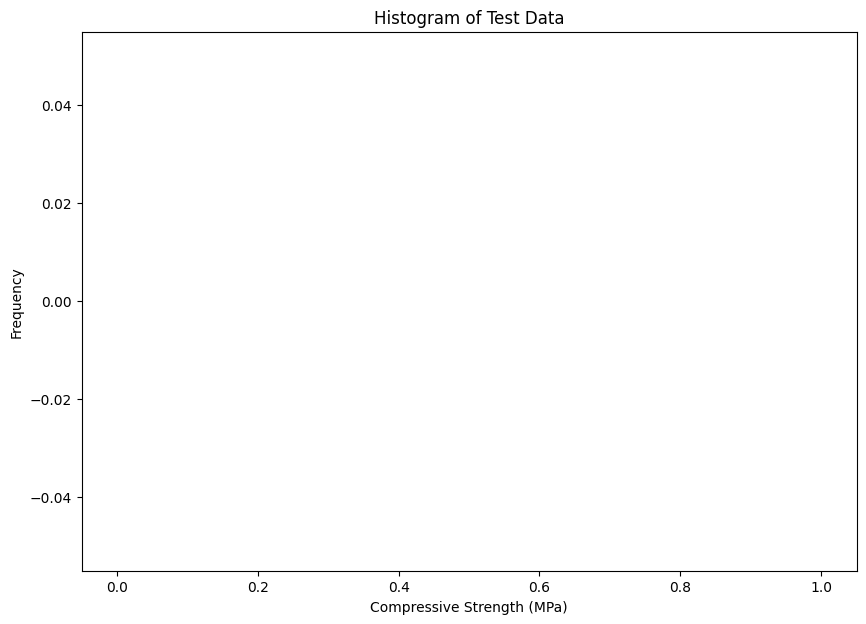

In [10]:
test_data = pd.DataFrame(columns=['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer', 'CoarseAggregate', 'FineAggregate', 'Age', 'CC_Strength'])

print("Press this button if you would like to add this data to a test database. (Plot only works on notebook)")
add_data_button = widgets.Button(description='Add Data') # Create a button widget to trigger the prediction
plot_data_button = widgets.Button(description='Plot')

def add_new_data(b): #function to add new data to the database
    global test_data 
    new_row = {'Cement': cement, 'BlastFurnaceSlag': blast, 'FlyAsh': fly, 'Water': water, 'Superplasticizer': superplastic, 'CoarseAggregate': coarse, 'FineAggregate': fine, 'Age': age, 'CC_Strength': prediction}
    test_data = pd.concat([test_data, pd.DataFrame([new_row])], ignore_index=True)
    with output:
        output.clear_output()
        display(test_data)
        
def plot_data(b):
    fig, ax = plt.subplots(figsize=(10,7))
    ax.hist(test_data['CC_Strength'], bins=20)
    ax.set_xlabel('Compressive Strength (MPa)')
    ax.set_ylabel('Frequency')
    ax.set_title('Histogram of Test Data')
    plt.show()
    
output = widgets.Output()        

add_data_button.on_click(add_new_data)
plot_data_button.on_click(plot_data)

display(add_data_button)
display(plot_data_button)
display(output)